# Day 44: Percentile Winsorization

**Percentile Winsorization** is an outlier treatment technique where extreme values are
**capped at specified lower and upper percentiles** instead of being removed.

## 🔹 What It Does
- Values below the lower percentile → set to that percentile value
- Values above the upper percentile → set to that percentile value
- Keeps **all data points** while reducing outlier influence

## 🔹 Why Use It?
- Preserves dataset size
- Robust to extreme values
- Simpler and more flexible than IQR in skewed data
- Widely used in **real-world ML preprocessing**

## 🔹 Common Percentile Choices
- 1st & 99th percentile
- 5th & 95th percentile (more aggressive)

## 🔹 When to Use
- When outliers are **valid but extreme**
- When data is **skewed**
- When trimming causes information loss


> Percentile Winsorization = “Cap extreme values using percentiles instead of deleting data.”

### We chose: 
>1st percentile → lower cap
>
>99th percentile → upper cap

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("weight-height.csv")

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

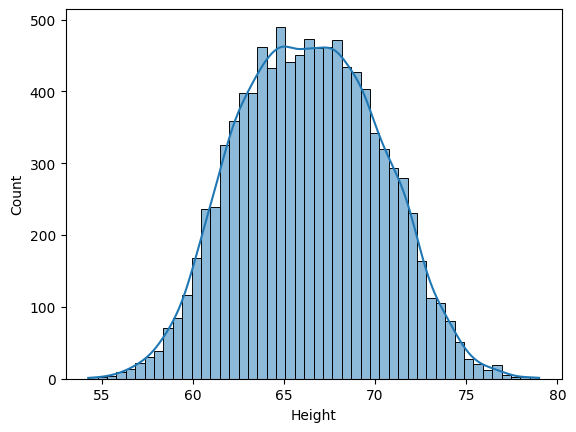

In [9]:
sns.histplot(df['Height'] , kde=True)
plt.show()

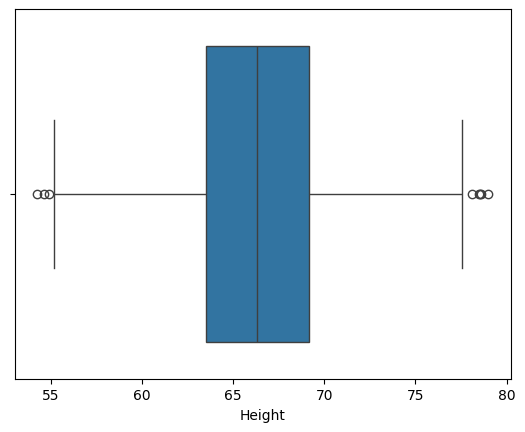

In [11]:
sns.boxplot(x=df['Height'])
plt.show()

✅ Use 1–99 percentile when:

1) Dataset is moderate or small
2) Outliers are valid values (like weights, marks, income)
3) You want to reduce influence, not reshape data
4) You’re building general ML models

> This is here case.

⚠️ Use 5–95 percentile only when:

1) Dataset is very large
2) Distribution has extreme long tails
3) Outliers are clearly harming model performance
4) You’ve verified it improves validation metrics
> Think of 5–95 as a strong medicine — effective, but risky.

In [13]:
upper_bound = df['Height'].quantile(0.99)
upper_bound

74.7857900583366

In [14]:
lower_bound = df['Height'].quantile(0.01)
lower_bound

58.13441158671655

In [17]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [18]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [24]:
new_df['Height'].describe()  ,df['Height'].describe()

(count    9799.000000
 mean       66.363507
 std         3.644267
 min        58.134496
 25%        63.577147
 50%        66.317899
 75%        69.119859
 max        74.767447
 Name: Height, dtype: float64,
 count    10000.000000
 mean        66.367560
 std          3.847528
 min         54.263133
 25%         63.505620
 50%         66.318070
 75%         69.174262
 max         78.998742
 Name: Height, dtype: float64)

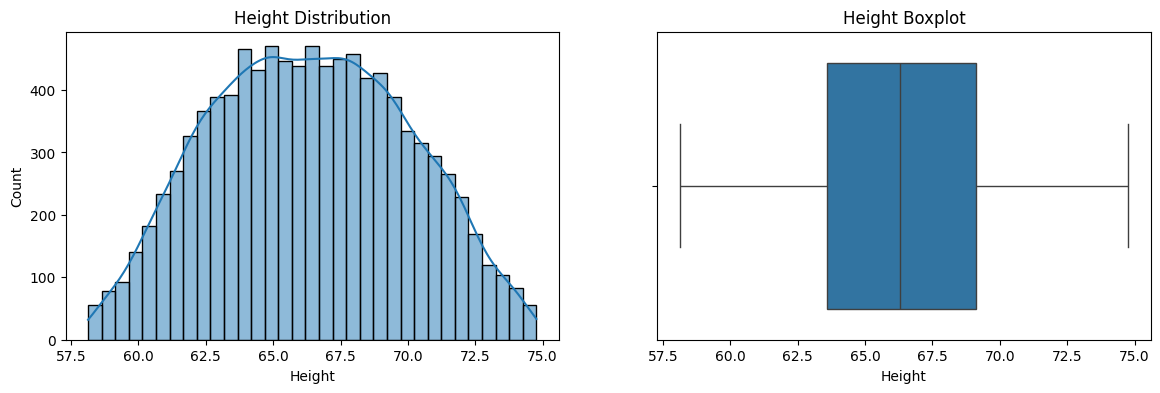

In [27]:
plt.figure(figsize=(14,4))

# Distplot (Histogram + KDE)
plt.subplot(1,2,1)
sns.histplot(new_df['Height'], kde=True)
plt.title("Height Distribution")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=new_df['Height'])
plt.title("Height Boxplot")

plt.show()

#### Winsorization 

In [29]:
df['Height'] = df['Height'].clip(
    lower=lower_bound,
    upper=upper_bound
)

In [31]:
df.shape

(10000, 3)

In [32]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

In [33]:
df1 = pd.read_csv("weight-height.csv")

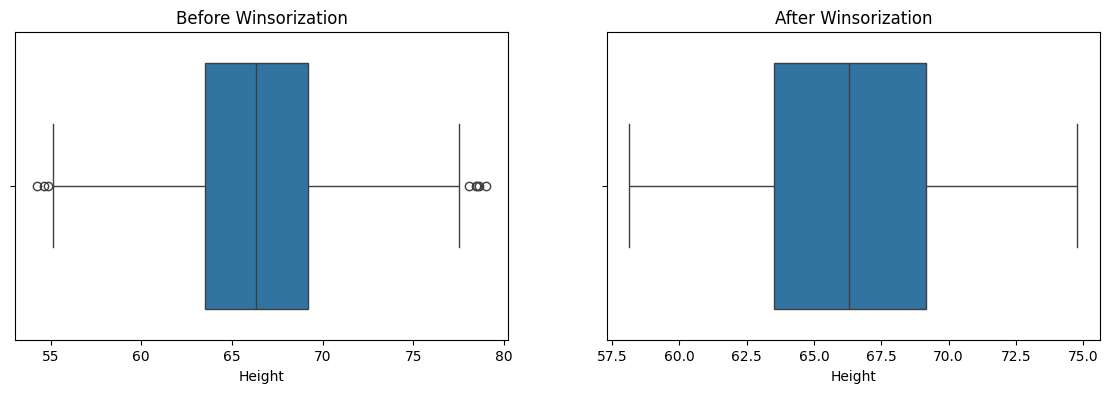

In [34]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.boxplot(x=df1['Height'])
plt.title("Before Winsorization")

plt.subplot(1,2,2)
sns.boxplot(x=df['Height'])
plt.title("After Winsorization")

plt.show()


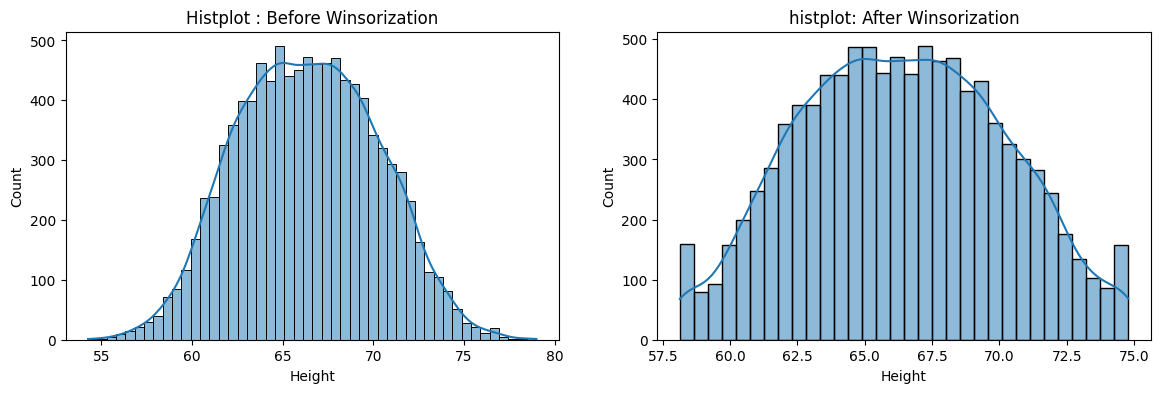

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.histplot(df1['Height'] , kde=True)
plt.title("Histplot : Before Winsorization")

plt.subplot(1,2,2)
sns.histplot(df['Height'] , kde=True)
plt.title("histplot: After Winsorization")

plt.show()